# Netflix Stock Prediction

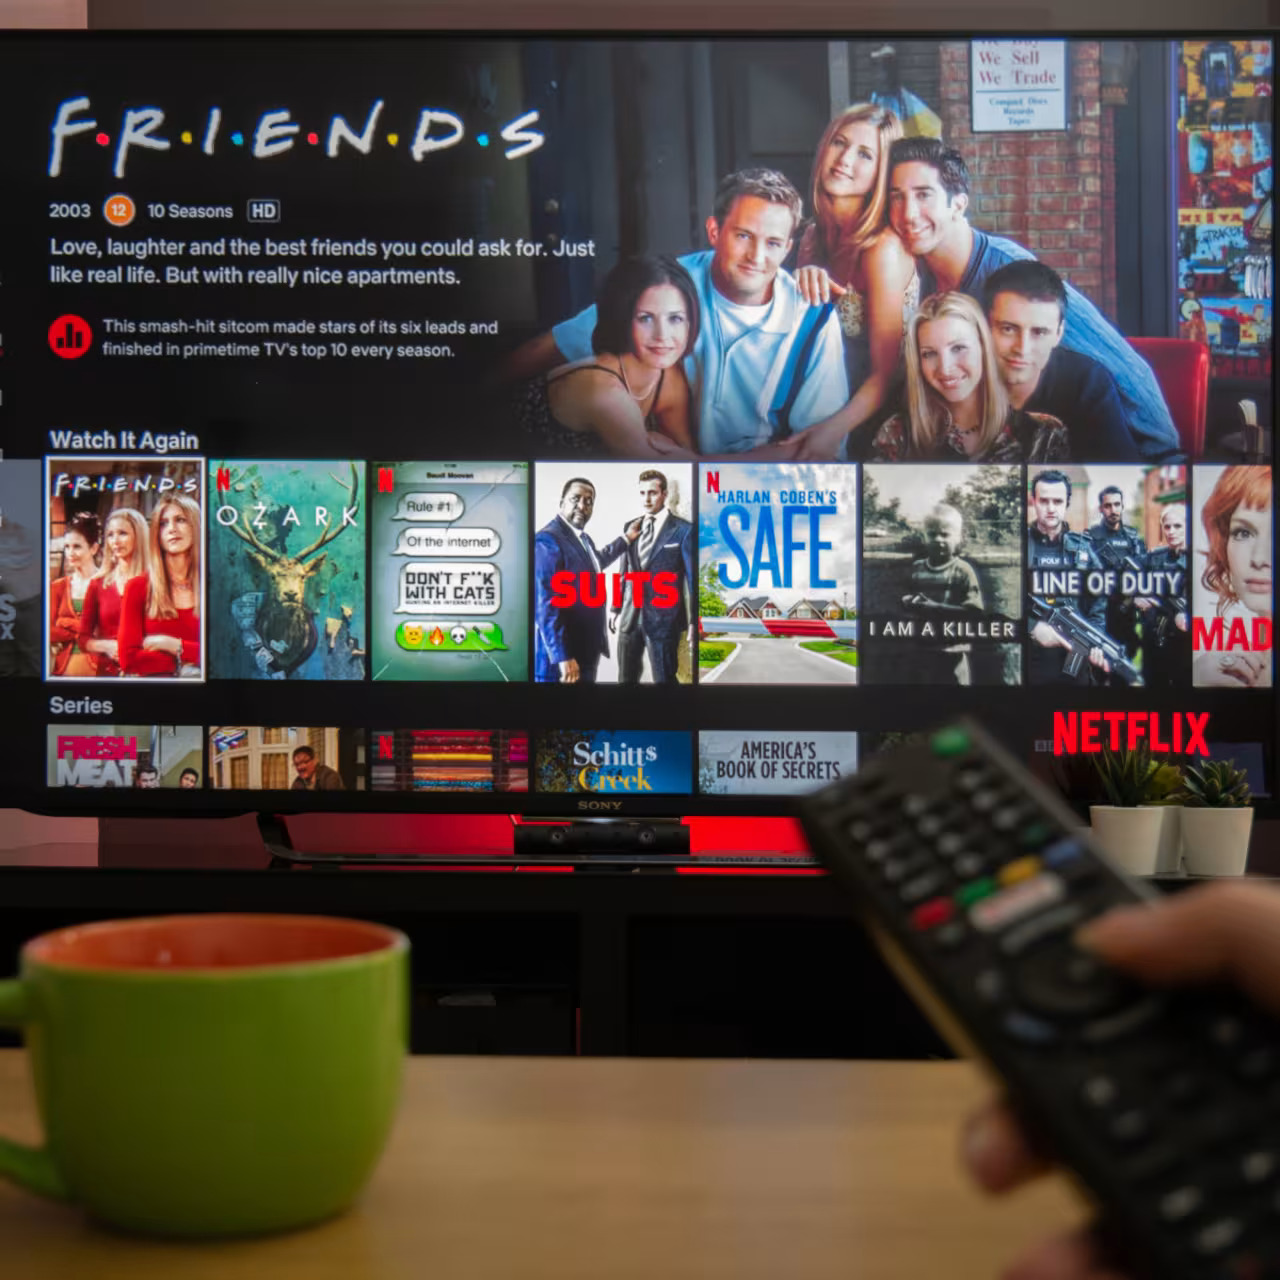

In [1]:
from IPython.display import Image

Image(filename='b1.jpg')

# Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 100)

In [4]:
data = pd.read_csv('netflix_stock.csv')
print("First 5 rows of Dataset: ")
data.head()

First 5 rows of Dataset: 


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
#missing values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
#checking for duplicacy
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


# Summary

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


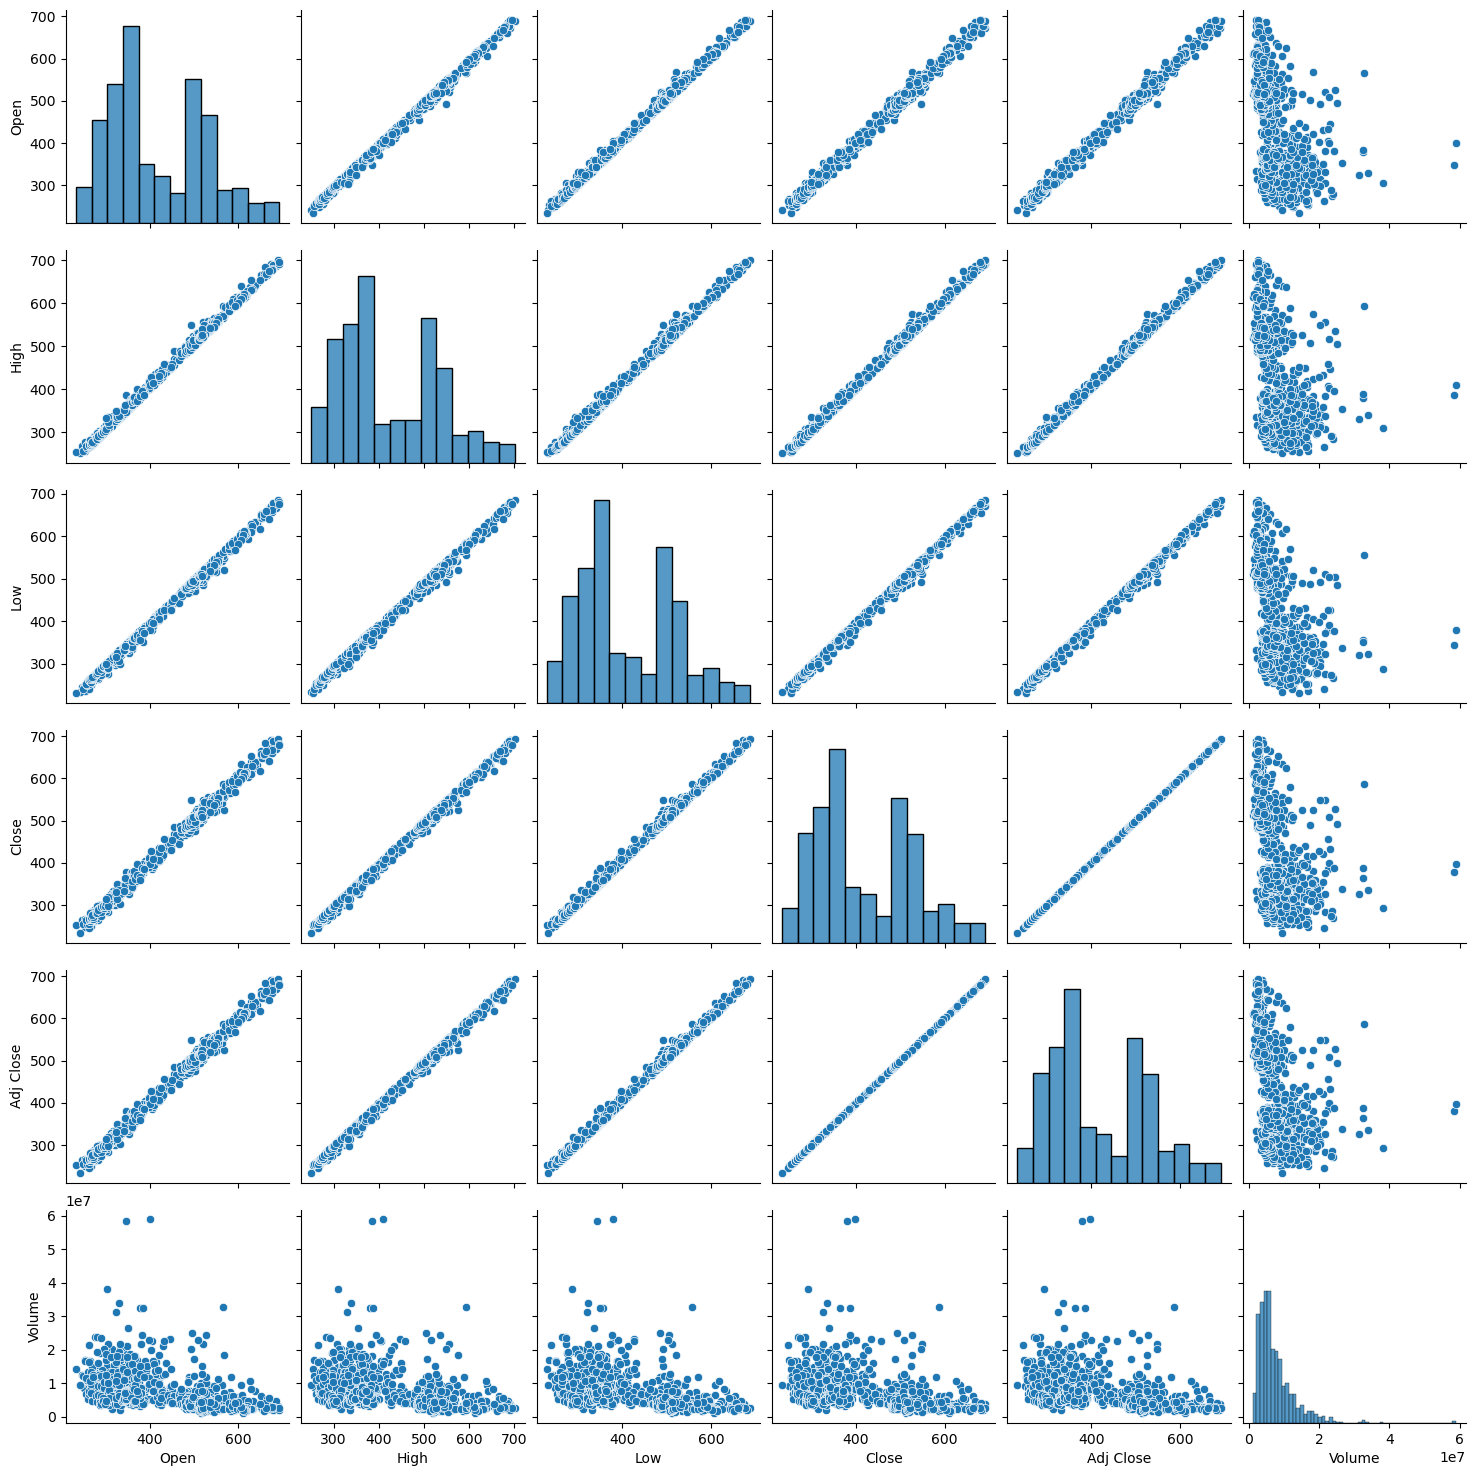

In [9]:
sns.pairplot(data=data)

<Axes: >

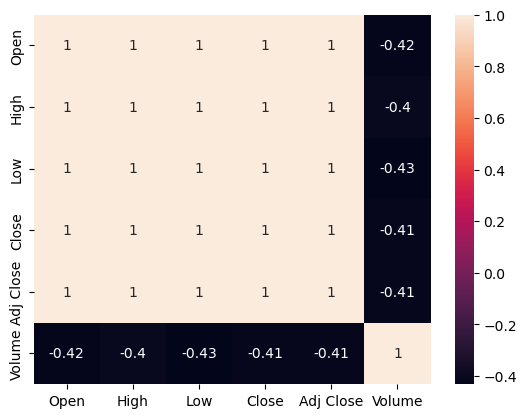

In [10]:
num_cols = data.select_dtypes(['int64', 'float64']).keys()
sns.heatmap(data[num_cols].corr(),annot = True )

In [11]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [12]:
data_copy = data.copy()

<Figure size 1600x700 with 0 Axes>

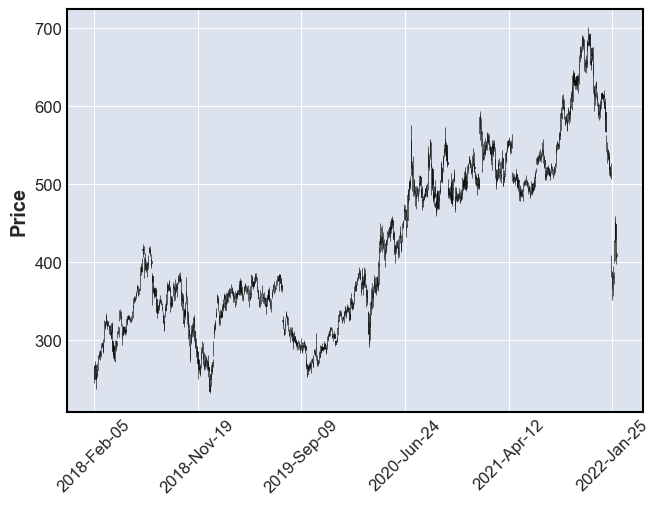

In [13]:
import mplfinance as mpf
plt.figure(figsize=(16,7))
data_copy.set_index('Date', inplace=True)

mpf.plot(data_copy, type='candle')

# Data Selection: Extracting Features (X) and Target (y)

In [14]:
X = data[['Open','High','Low','Volume']]
y = data['Close']

# Standard Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting Scaled data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Logistic Model

In [17]:
from sklearn.linear_model import LinearRegression
log_reg = LinearRegression()
log_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred=log_reg.predict(X_test)

# Evaluation

In [19]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

r2 = metrics.r2_score(y_test, y_pred)
print('R-squared (R2) Score:', r2)

Mean Squared Error (MSE): 15.976946096504696
Root Mean Squared Error (RMSE): 3.9971172232628724
Mean Absolute Error (MAE): 2.857186533234401
R-squared (R2) Score: 0.9986297713881579


In [20]:
df = {'Actual': y_test, 'Predicted': y_pred}
df2 = pd.DataFrame(df)
df2['MAE'] = abs(df2['Actual'] - df2['Predicted'])

df2['MSE'] = (df2['Actual'] - df2['Predicted']) ** 2

df2

,Actual,Predicted,MAE,MSE
628,509.640015,508.503210,1.136805,1.292325
631,494.730011,492.622129,2.107882,4.443167
741,500.859985,506.904498,6.044513,36.536140
514,380.070007,380.941828,0.871821,0.760072
365,315.100006,319.219895,4.119889,16.973485
...,...,...,...,...
780,518.020020,519.060313,1.040293,1.082209
334,355.730011,352.755201,2.974810,8.849497
210,275.329987,284.160124,8.830137,77.971327
350,370.019989,369.504603,0.515386,0.265623


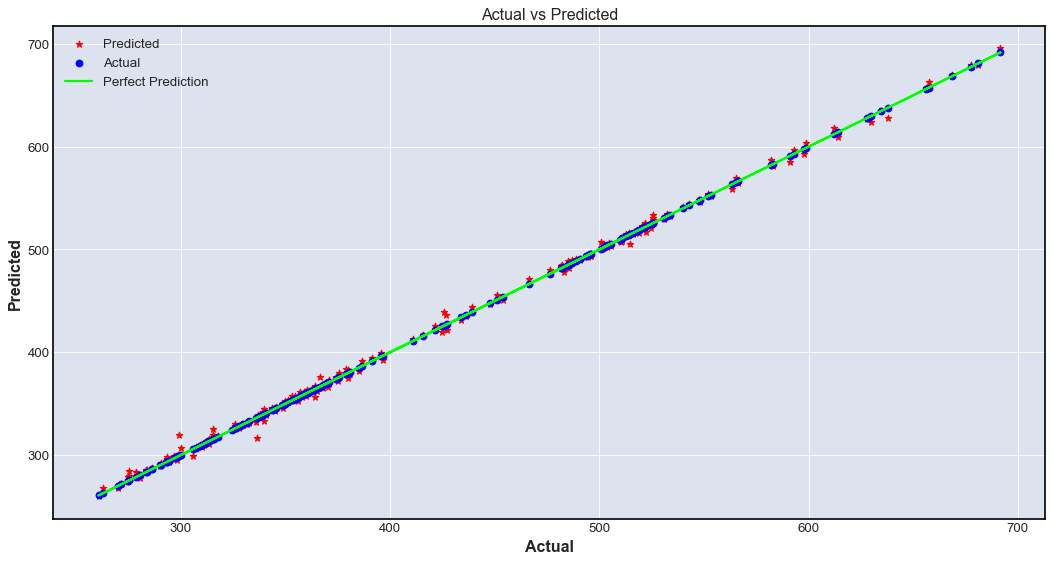

In [21]:
plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(y_test, y_pred, color='red', marker='*', label='Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.plot(y_test, y_test, color='lime', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

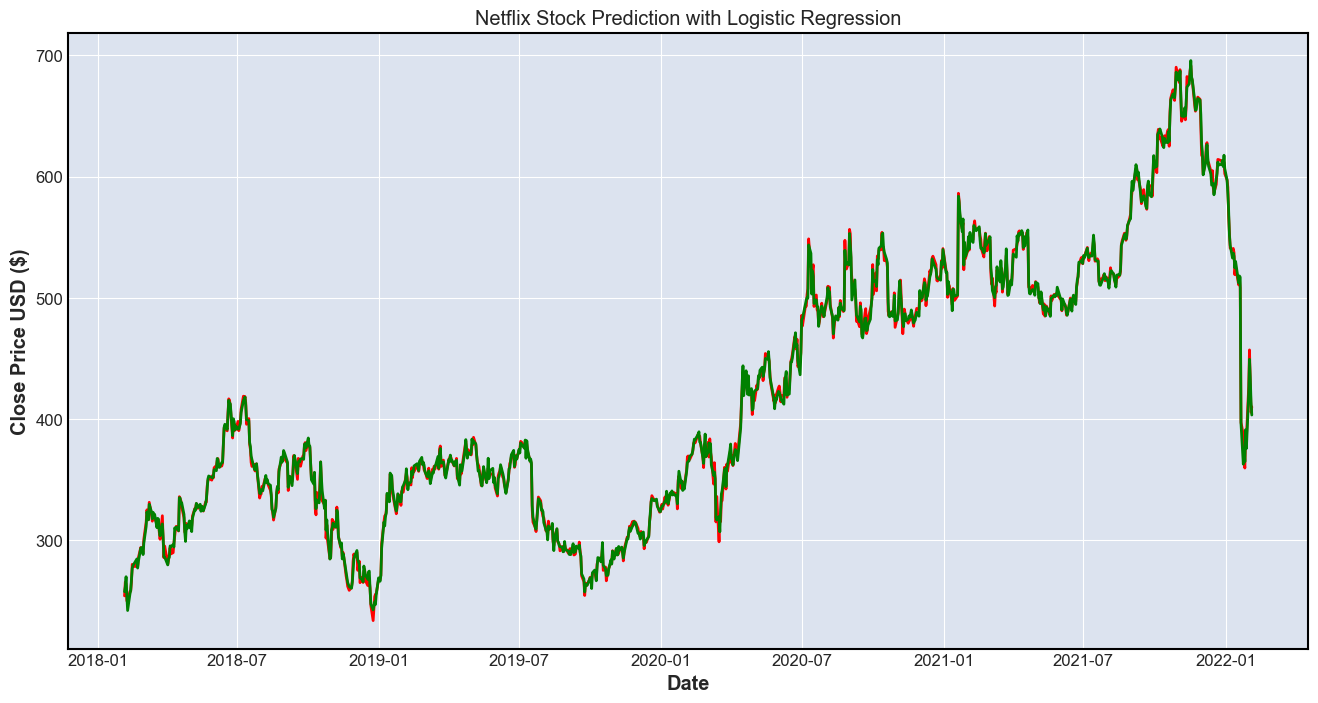

In [22]:
plt.figure(figsize=(16,8))
plt.title('Netflix Stock Prediction with Logistic Regression')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(data['Date'], data['Close'],color='red')
plt.plot(data['Date'],log_reg.predict(X),color='green',label='Predicted Price')
plt.show()

# LSTM

In [23]:
data = data.sort_values('Date')
target_var = data[['Close']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
target_var = scaler.fit_transform(target_var)

In [24]:
def create_sequences(target_var, look_back=1):
    data_X, data_y = [], []
    for i in range(len(target_var) - look_back):
        data_X.append(target_var[i:(i + look_back), 0])
        data_y.append(target_var[i + look_back, 0])
    return np.array(data_X), np.array(data_y)

In [25]:
look_back = 20
X, y = create_sequences(target_var, look_back)

In [26]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [27]:
# Reshape the input data to fit the LSTM input shape (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
# train_data['year'] = train_data['Date'].dt.year
# train_data['month'] = train_data['Date'].dt.month
# train_data['day'] = train_data['Date'].dt.day
# # Add more features as needed

# # Now, you can drop the original timestamp column
# train_data.drop(columns=['Date'], inplace=True)

In [31]:
# !pip install tensorflow

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [29]:
from tensorflow import keras
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
791/791 - 8s - loss: 0.0043 - 8s/epoch - 10ms/step
Epoch 2/100
791/791 - 6s - loss: 0.0015 - 6s/epoch - 7ms/step
Epoch 3/100
791/791 - 6s - loss: 0.0011 - 6s/epoch - 8ms/step
Epoch 4/100
791/791 - 6s - loss: 9.2424e-04 - 6s/epoch - 7ms/step
Epoch 5/100
791/791 - 6s - loss: 8.2736e-04 - 6s/epoch - 8ms/step
Epoch 6/100
791/791 - 6s - loss: 7.6500e-04 - 6s/epoch - 8ms/step
Epoch 7/100
791/791 - 6s - loss: 7.4252e-04 - 6s/epoch - 8ms/step
Epoch 8/100
791/791 - 6s - loss: 6.7033e-04 - 6s/epoch - 8ms/step
Epoch 9/100
791/791 - 6s - loss: 6.7286e-04 - 6s/epoch - 8ms/step
Epoch 10/100
791/791 - 6s - loss: 6.4656e-04 - 6s/epoch - 8ms/step
Epoch 11/100
791/791 - 6s - loss: 6.4922e-04 - 6s/epoch - 8ms/step
Epoch 12/100
791/791 - 6s - loss: 6.7621e-04 - 6s/epoch - 7ms/step
Epoch 13/100
791/791 - 6s - loss: 6.1334e-04 - 6s/epoch - 8ms/step
Epoch 14/100
791/791 - 6s - loss: 6.3748e-04 - 6s/epoch - 8ms/step
Epoch 15/100
791/791 - 6s - loss: 6.3866e-04 - 6s/epoch - 7ms/step
Epoch 16/100
79

In [31]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

7/7 [==============================] - 0s 7ms/step


In [32]:
train_prediction = scaler.inverse_transform(train_prediction)
y_train = scaler.inverse_transform([y_train])
test_prediction = scaler.inverse_transform(test_prediction)
y_test = scaler.inverse_transform([y_test])

In [33]:
train_rmse = np.sqrt(np.mean((train_prediction - y_train[0])**2))

# Calculate RMSE for test data
test_rmse = np.sqrt(np.mean((test_prediction - y_test[0])**2))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 120.50176739076366
Test RMSE: 91.60145318465564


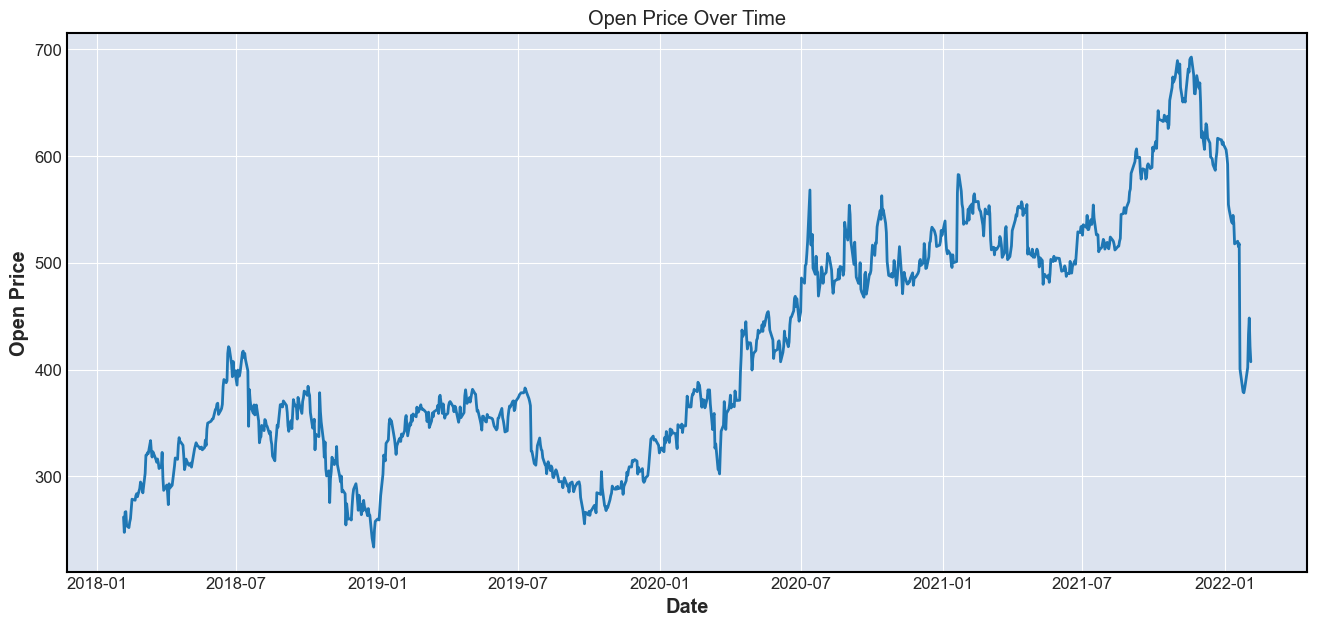

In [34]:
plt.figure(figsize=(16,7))
plt.plot(data['Date'], data['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Over Time')
plt.show()

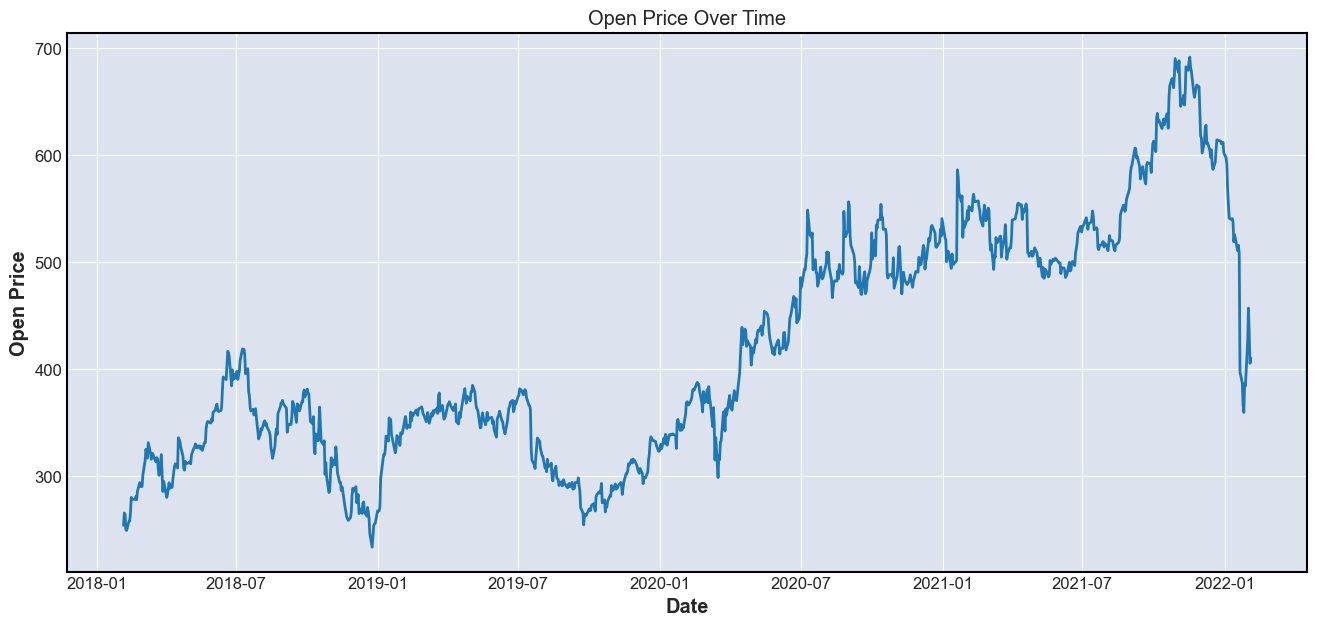

In [35]:
plt.figure(figsize=(16,7))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Over Time')
plt.show()

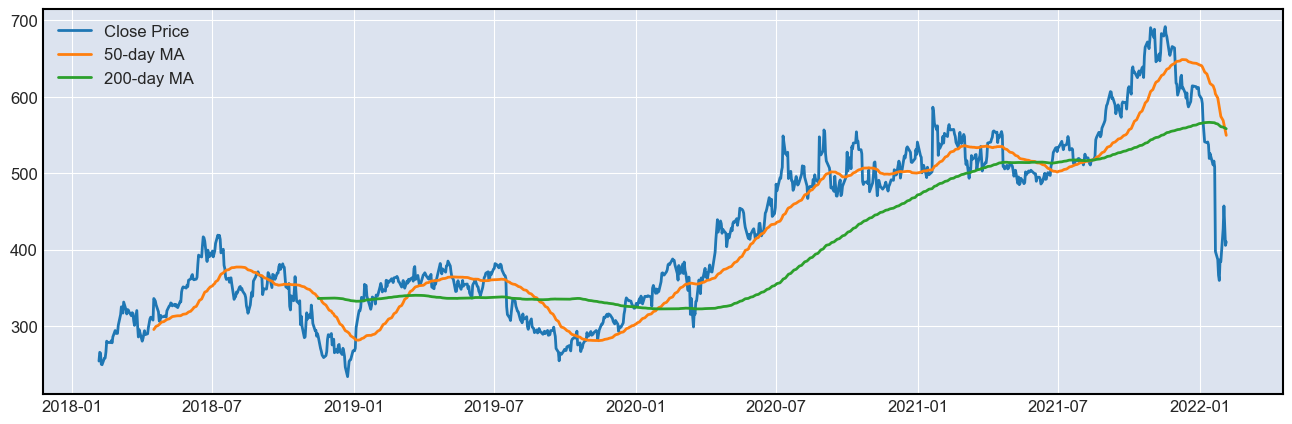

In [36]:
# Calculate 50-day and 200-day moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(16,5))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA50'], label='50-day MA')
plt.plot(data['Date'], data['MA200'], label='200-day MA')
plt.legend()
plt.show()

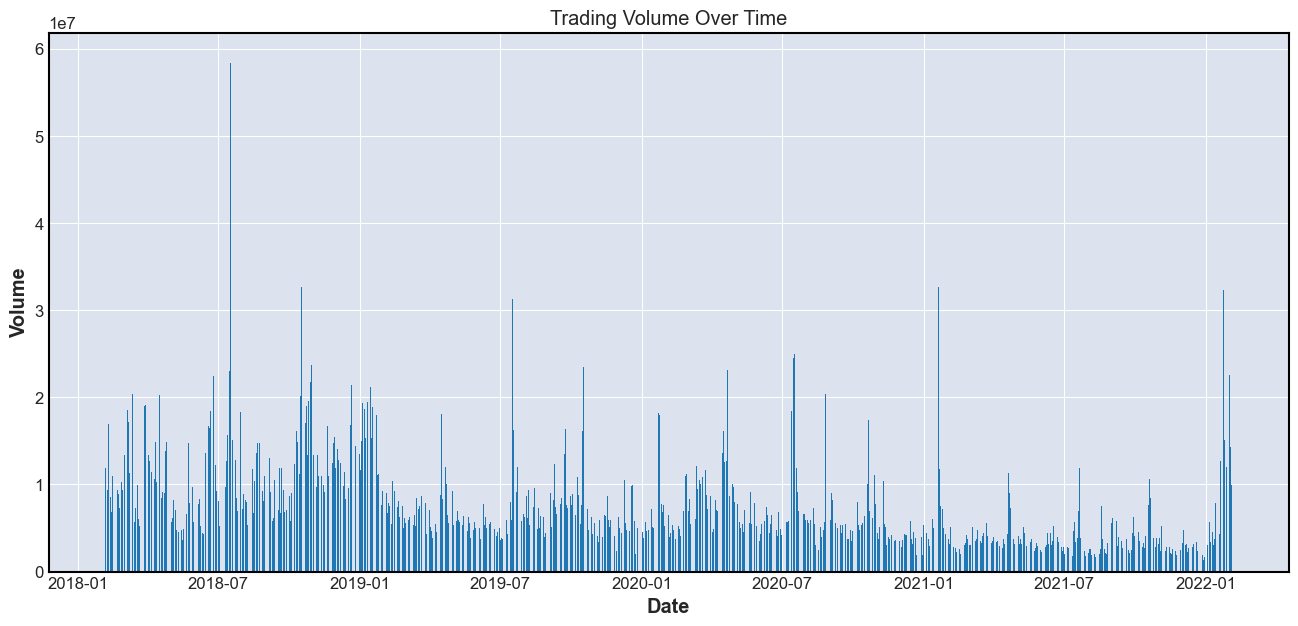

In [37]:
plt.figure(figsize=(16,7))
plt.bar(data['Date'], data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.show()

In [38]:
# Expanding the dataset by including future dates for forecasting (e.g., predicting for the next 30 days beyond the current available data)
extended_dates = pd.date_range(start=data['Date'].max(), periods=30, freq='D')
extended_dates = pd.DataFrame({'Date': extended_dates})
extended_df = pd.concat([data, extended_dates], ignore_index=True)

In [39]:
extended_data = scaler.transform(extended_df[['Close']].values.astype(float))
X_extended, y_extended = create_sequences(extended_data, look_back)
X_extended = np.reshape(X_extended, (X_extended.shape[0], X_extended.shape[1], 1))

In [40]:
extended_predict = model.predict(X_extended)
extended_predict = scaler.inverse_transform(extended_predict)

32/32 [==============================] - 0s 3ms/step


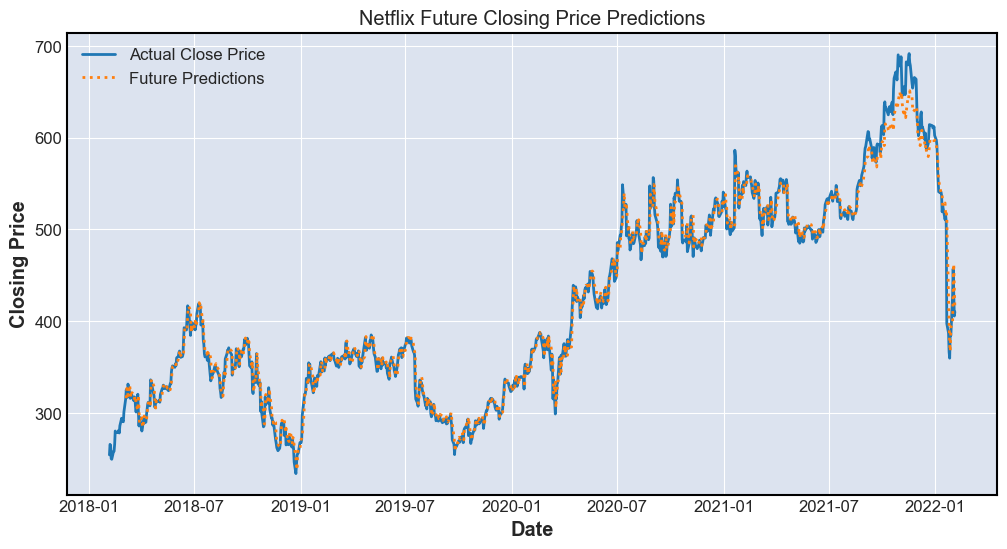

In [41]:
# Plot the actual data and future predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Close Price')
plt.plot(extended_df.iloc[look_back:]['Date'], extended_predict, label='Future Predictions', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Netflix Future Closing Price Predictions')
plt.legend()
plt.show()

In [42]:
# Filter the data for the year 2020
date_2021 = data[data['Date'].dt.year == 2021]

dates_2021 = date_2021['Date'][look_back + 1:].reset_index(drop=True)  # Adjusted indexing
actual_prices_2021 = date_2021['Close'][look_back:-1].reset_index(drop=True)  # Adjusted indexing
predicted_prices_2021 = extended_predict[-len(dates_2021):].flatten()  # Flattening the predicted prices array

closing_prices_2021_df = pd.DataFrame({'Date': dates_2021, 'Actual': actual_prices_2021, 'Predicted': predicted_prices_2021})
closing_prices_2021_df

,Date,Actual,Predicted
0,2021-02-03,548.159973,517.040222
1,2021-02-04,539.450012,513.566345
2,2021-02-05,552.159973,509.733734
3,2021-02-08,550.789978,512.891602
4,2021-02-09,547.919983,509.774933
...,...,...,...
226,2021-12-27,614.090027,NaN
227,2021-12-28,613.119995,NaN
228,2021-12-29,610.710022,NaN
229,2021-12-30,610.539978,NaN
